In [1]:
import sys
print(sys.version)


3.8.8 (v3.8.8:024d8058b0, Feb 19 2021, 08:48:17) 
[Clang 6.0 (clang-600.0.57)]


In [11]:
import pandas as pd
print(pd.__version__)


2.0.3


In [8]:
import nltk
print(nltk.__version__)


3.9.1


In [12]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
import string

# nltk 자원 (최초 1회만 필요)
nltk.download('punkt')
nltk.download('stopwords')

# 엑셀 불러오기
df = pd.read_excel('/content/sample_data/123건scopus_export_Nov 11-2025.xlsx')

# 1) 텍스트 컬럼 합치기
df['Title_Author Keywords_Abstract'] = (
    df['Title'].fillna('') + ' ' +
    df['Author Keywords'].fillna('') + ' ' +
    df['Abstract'].fillna('')
)

# 2) 전처리 함수
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha()]  # 알파벳만

    # ---- 불용어 설정 ----
    base_stop = set(stopwords.words('english'))
    custom_stop = {
        # 도메인/서지 노이즈
        "study","paper","result","results","method","methods","analysis","approach",
        "conclusion","implication","implications","introduction","discussion",
        "based","using","use","used","new","one","two","three","within","across",
        "haptic","touch","tactile","design","process","explore","common","user","reserve","tool","provide",
        "work","practice","model","product","commun","student","system","object","support","effect","make","develop","engaged","differ",
        "concern","tactile","touch","haptic","design","process","engaged","augmented",
        # 학술 메타 단어
        "research","article","publisher","scopus","elsevier","copyright","right","project","research",
        # 약한 의미의 일반어
        "also","may","might","many","much","etc","e.g","i.e","however","therefore","understand",
        "thus","well","among","between","due","et","al","bv","method"
    }
    all_stop = base_stop | custom_stop

    # 스템 기반 비교를 위한 준비
    stemmer = PorterStemmer()
    stemmed_stop = {stemmer.stem(w) for w in all_stop}

    # 1) 원형 불용어 제거 OR 2) 스템 불용어 제거
    filtered = []
    for t in tokens:
        if (t in all_stop):
            continue
        t_stem = stemmer.stem(t)
        if t_stem in stemmed_stop:
            continue
        filtered.append(t_stem)  # 바로 스템으로 적재

    return filtered

# 3) 전체 토큰화 및 카운트
all_tokens = []
for text in df['Title_Author Keywords_Abstract']:
    all_tokens.extend(preprocess_text(text))

word_freq = Counter(all_tokens)

# 4) 상위 20개
most_common_words = word_freq.most_common(20)
print("Top 20 most common words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

# (선택) DataFrame 저장
freq_df = pd.DataFrame(most_common_words, columns=['word', 'frequency'])


[nltk_data] Downloading package punkt to /Users/pinetree/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pinetree/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/123건scopus_export_Nov 11-2025.xlsx'

In [31]:
df

,Title,Year,Source title,Cited by,Abstract,Author Keywords,Publisher,Document Type,Publication Stage,Title_Author Keywords_Abstract
0,Carbon Interactive Device Design Based on Open...,2025,NaN,0,This paper focuses on the topic of intergenera...,Arduino; carbon emissions; interactive devices...,"Association for Computing Machinery, Inc",Conference paper,Final,Carbon Interactive Device Design Based on Open...
1,Modeling of collaborative perception of tactil...,2025,NaN,0,This paper proposes a collaborative perception...,collaborative perception; multimodal fusion; s...,"Association for Computing Machinery, Inc",Conference paper,Final,Modeling of collaborative perception of tactil...
2,Affective Qualities in Virtual Fashion: Explor...,2025,Archives of Design Research,0,"Background As the Metaverse matures, virtual f...",Affective Quality; Design Element; Emotional D...,Korean Society of Design Science,Article,Final,Affective Qualities in Virtual Fashion: Explor...
3,Visual Art Accessibility and Art Experience fo...,2025,International Journal of Design in Society,0,Social inclusion for blind people is always ne...,Art Accessibility; Assistive Technology; Multi...,Common Ground Research Networks,Article,Final,Visual Art Accessibility and Art Experience fo...
4,Capstone Design for Innovation in Generation M...,2025,Archives of Design Research,0,Background: Customers experience a complex cus...,Capstone Design; Customer Experience(CX); Home...,Korean Society of Design Science,Article,Final,Capstone Design for Innovation in Generation M...
...,...,...,...,...,...,...,...,...,...,...
118,An investigation into the implementation of vi...,2006,Design Studies,67,Virtual reality (VR) technologies provide nove...,Computer aided design; Conceptual design; Inte...,Elsevier Ltd,Article,Final,An investigation into the implementation of vi...
119,An evaluation of haptic feedback modelling dur...,2005,Design Studies,33,Whilst new technologies in designing and rapid...,Case study; Computer-aided design; Conceptual ...,NaN,Article,Final,An evaluation of haptic feedback modelling dur...
120,“There has always been a relationship between ...,2005,Architectural Design,0,Best Known for his tactile and colourful furni...,Doha Qatar; Grand Hotel Salome; Lo-rez-Dolores...,"Conde Nast Publications, Inc.",Article,Final,“There has always been a relationship between ...
121,Urban space and its information field,1999,Journal of Urban Design,46,This paper proposes an essentially new theory ...,NaN,Carfax Publishing Company,Article,Final,Urban space and its information field This pa...


In [5]:
!pip install nltk
import nltk
for pkg in ['punkt', 'punkt_tab', 'stopwords', 'wordnet']:
    nltk.download(pkg)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
df['Title_Author Keywords_Abstract'] = (
    df['Title'].fillna('') + ' ' +
    df['Author Keywords'].fillna('') + ' ' +
    df['Abstract'].fillna('')
)


In [7]:
df['Title_Author Keywords_Abstract']

,Title_Author Keywords_Abstract
0,Carbon Interactive Device Design Based on Open...
1,Modeling of collaborative perception of tactil...
2,Affective Qualities in Virtual Fashion: Explor...
3,Visual Art Accessibility and Art Experience fo...
4,Capstone Design for Innovation in Generation M...
...,...
118,An investigation into the implementation of vi...
119,An evaluation of haptic feedback modelling dur...
120,“There has always been a relationship between ...
121,Urban space and its information field This pa...


In [42]:
df['tokens'] = df['Title_Author Keywords_Abstract'].apply(preprocess_text)

In [43]:
if 'tokens' in df.columns:
    # Use the column
    result = df['tokens']
else:
    print("Column 'tokens' not found")

In [44]:
print(df['tokens'].head(10))
print("중복 포함 토큰 수:", df['tokens'].apply(len).sum())
print("고유 토큰 수:", len(set([w for doc in df['tokens'] for w in doc])))


0    [carbon, interact, devic, open, sourc, hardwar...
1    [collabor, percept, feedback, spatial, audio, ...
2    [affect, qualiti, virtual, fashion, percept, c...
3    [visual, art, access, art, experi, blind, visu...
4    [capston, innov, gener, mz, home, applianc, cu...
5    [silent, spring, listen, bird, song, situat, s...
6    [sensori, fashion, garment, visual, impairedch...
7    [let, go, fear, bias, perspect, histor, cloth,...
8    [symbol, rais, awar, visual, impair, person, f...
9    [percept, landscap, qualiti, histor, citi, cen...
Name: tokens, dtype: object
중복 포함 토큰 수: 12721
고유 토큰 수: 2995


In [11]:
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [12]:
# 테스트용 문자열
text = "LDA is a topic modeling technique used in natural language processing."

tokens = word_tokenize(text.lower())
tagged = nltk.pos_tag(tokens)
print(tagged)

[('lda', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('topic', 'NN'), ('modeling', 'NN'), ('technique', 'NN'), ('used', 'VBN'), ('in', 'IN'), ('natural', 'JJ'), ('language', 'NN'), ('processing', 'NN'), ('.', '.')]


In [13]:
df['Title_Author Keywords_Abstract']

,Title_Author Keywords_Abstract
0,Carbon Interactive Device Design Based on Open...
1,Modeling of collaborative perception of tactil...
2,Affective Qualities in Virtual Fashion: Explor...
3,Visual Art Accessibility and Art Experience fo...
4,Capstone Design for Innovation in Generation M...
...,...
118,An investigation into the implementation of vi...
119,An evaluation of haptic feedback modelling dur...
120,“There has always been a relationship between ...
121,Urban space and its information field This pa...


In [14]:
print(df.columns)

Index(['Title', 'Year', 'Source title', 'Cited by', 'Abstract',
       'Author Keywords', 'Publisher', 'Document Type', 'Publication Stage',
       'Title_Author Keywords_Abstract', 'tokens'],
      dtype='object')


In [15]:
# @title
for pkg in ['punkt', 'punkt_tab', 'stopwords', 'wordnet',
            'averaged_perceptron_tagger', 'averaged_perceptron_tagger_eng']:
    nltk.download(pkg)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [16]:
print(df['Title_Author Keywords_Abstract'].head(10))
print(type(df['Title_Author Keywords_Abstract'].iloc[0]))

0    Carbon Interactive Device Design Based on Open...
1    Modeling of collaborative perception of tactil...
2    Affective Qualities in Virtual Fashion: Explor...
3    Visual Art Accessibility and Art Experience fo...
4    Capstone Design for Innovation in Generation M...
5    This is Not a Silent Spring: Listening to bird...
6    Tactile and sensory fashion garments for the v...
7    Letting go of fear and biases: new perspective...
8    Design Symbols to Raise Awareness of Visually ...
9    Perceptions of Landscape Quality in the Histor...
Name: Title_Author Keywords_Abstract, dtype: object
<class 'str'>


In [17]:
df.to_csv('cleaned_file.csv', index=False, encoding='utf-8')


In [18]:
df = pd.read_csv('cleaned_file.csv', encoding='utf-8')


In [19]:
# import pandas as pd

# # 저장했던 정제파일 불러오기
# df = pd.read_csv('cleaned_file.csv', encoding='utf-8')

# 빈도분석 및 워드크라우드 시각화

In [54]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
import string

# nltk 자원 (최초 1회만 필요)
nltk.download('punkt')
nltk.download('stopwords')

# 엑셀 불러오기
df = pd.read_excel('/content/sample_data/123건scopus_export_Nov 11-2025.xlsx')

# 1) 텍스트 컬럼 합치기
df['Title_Author Keywords_Abstract'] = (
    df['Title'].fillna('') + ' ' +
    df['Author Keywords'].fillna('') + ' ' +
    df['Abstract'].fillna('')
)

# 2) 전처리 함수
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha()]  # 알파벳만

    # ---- 불용어 설정 ----
    base_stop = set(stopwords.words('english'))
    custom_stop = {
        # 도메인/서지 노이즈
        "study","paper","result","results","method","methods","analysis","approach",
        "conclusion","implication","implications","introduction","discussion",
        "based","using","use","used","new","one","two","three","within","across",
        "haptic","touch","tactile","design","process","explore","common","user","reserve","tool","provide",
        "work","practice","model","product","commun","student","system","object","support","effect","make","develop","engaged","differ",
        # 학술 메타 단어
        "research","article","publisher","scopus","elsevier","copyright","right","project",
        # 약한 의미의 일반어
        "also","may","might","many","much","etc","e.g","i.e","however","therefore","understand",
        "thus","well","among","between","due","et","al","bv","method"
    }
    all_stop = base_stop | custom_stop

    # 스템 기반 비교를 위한 준비
    stemmer = PorterStemmer()
    stemmed_stop = {stemmer.stem(w) for w in all_stop}

    # 1) 원형 불용어 제거 OR 2) 스템 불용어 제거
    filtered = []
    for t in tokens:
        if (t in all_stop):
            continue
        t_stem = stemmer.stem(t)
        if t_stem in stemmed_stop:
            continue
        filtered.append(t_stem)  # 바로 스템으로 적재

    return filtered

# 3) 전체 토큰화 및 카운트
all_tokens = []
for text in df['Title_Author Keywords_Abstract']:
    all_tokens.extend(preprocess_text(text))

word_freq = Counter(all_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:

# tokens 컬럼 생성
df['tokens'] = df['Title_Author Keywords_Abstract'].apply(preprocess_text)


In [57]:

# 빈도분석
all_tokens = [token for doc in df['tokens'] for token in doc]
total_token_count = len(all_tokens)
unique_token_count = len(set(all_tokens))

print(f"중복 포함 전체 단어 수: {total_token_count}")
print(f"고유 단어 수: {unique_token_count}")

token_counts = Counter(all_tokens)
top_50 = token_counts.most_common(50)

print("\n상위 50개 단어 및 빈도:")
for word, freq in top_50:
    print(f"{word}: {freq}")


중복 포함 전체 단어 수: 12721
고유 단어 수: 2995

상위 50개 단어 및 빈도:
interact: 150
experi: 133
materi: 129
visual: 108
digit: 85
architectur: 61
social: 59
space: 58
activ: 58
technolog: 56
percept: 53
inform: 53
environ: 50
prototyp: 50
cultur: 43
sens: 43
evalu: 42
textil: 42
textur: 40
innov: 39
educ: 37
gener: 37
build: 37
futur: 36
form: 36
interfac: 36
affect: 35
concept: 35
art: 35
peopl: 35
learn: 35
access: 34
present: 34
sensori: 34
data: 32
virtual: 32
way: 32
physic: 32
applic: 32
time: 31
collabor: 31
consid: 31
qualiti: 30
function: 30
fashion: 29
context: 29
conduct: 29
knowledg: 29
creat: 28
complex: 28


In [58]:
all_tokens = []

for text in df['Title_Author Keywords_Abstract']:
    tokens = preprocess_text(text)  # 전처리 함수로 토큰화 및 정제
    all_tokens.extend(tokens)


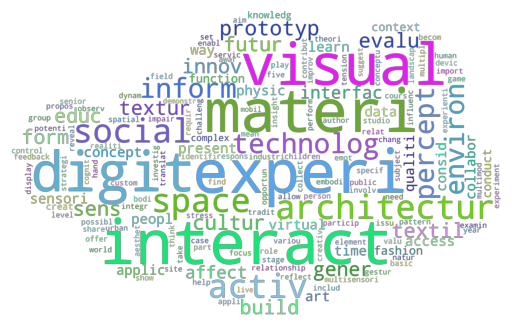

In [81]:
from PIL import Image, ImageOps, ImageFilter
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import random


# 1. 단어 빈도 준비
word_freq = Counter(all_tokens)

# # 2. 구름 모양 마스크 (색 반전)
# cloud_mask = np.array(Image.open('/content/sample_data/blcak_cloud2.png').convert("L"))
# cloud_mask = ImageOps.invert(Image.fromarray(cloud_mask))
# cloud_mask = np.array(cloud_mask)
# 2. 구름 모양 마스크
cloud_mask = np.array(Image.open('/content/sample_data/blcak_cloud2.png'))
cloud_mask = (Image.fromarray(cloud_mask))
cloud_mask = np.array(cloud_mask)




# 3. 워드클라우드 생성
wc = WordCloud(
    width=2000,
    height=1200,
    background_color=None,
    mode='RGBA',
    max_words=2400,
    mask=cloud_mask,
    contour_width=0,
    collocations=False,
    max_font_size=220,
    min_font_size=25,        # 최소 글씨 크기
    relative_scaling=0.2,    # 작은 글씨 키우기
    prefer_horizontal=0.95,  # 거의 가로 배치
    scale=3                # 해상도 높여 부드럽게
)

cloud = wc.generate_from_frequencies(word_freq)

# 3. 파스텔 컬러 팔레트
def pastel_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = random.randint(50, 300)        # 색상(Hue)
    s = random.randint(40, 90)        # 채도(Saturation)
    l = random.randint(40, 70)        # 명도(Lightness, 밝기 높게 → 파스텔)
    return f"hsl({h}, {s}%, {l}%)"

# pastel_colors = [(255,170,193),(173,216,230),(152,251,152),(255,228,196),(221,160,221)]
# def pastel_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
#     return random.choice(pastel_colors)


# 파스텔 색 적용
wc = wc.recolor(color_func=pastel_color_func)


# 4. 이미지 저장
cloud.to_file('word_cloud_transparent.png')

# 5. 화면 출력
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [82]:
from collections import Counter

# all_tokens 는 토큰 리스트 (예: df['tokens']를 모두 모은 리스트)
word_freq = Counter(all_tokens)


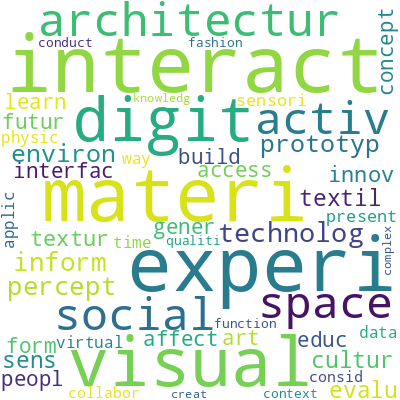

In [83]:
wc = WordCloud(background_color='white', max_words=50, width=400, height=400)
cloud = wc.fit_words(word_freq)
cloud.to_file('word_cloud.png')
cloud.to_image()


# TF-IDF 및 워드크라우드 시각화

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(max_features=3000)
dtm2 = cv.fit_transform(df['Title_Author Keywords_Abstract'])  # 반드시 fit_transform 수행 필요

df2 = pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    'tf-idf': dtm2.sum(axis=0).flat
})
df2 = df2.sort_values('tf-idf', ascending=False)


In [85]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=3000)  # 최대 3000개 단어 추출 예시

# df['Title_Author Keywords_Abstract'] 에서 텍스트 리스트 추출
documents = df['Title_Author Keywords_Abstract'].fillna('').tolist()

# 문서-단어 행렬 생성 (희소행렬)
tdm = cv.fit_transform(documents)


In [86]:
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd
import numpy as np

trans = TfidfTransformer()
dtm2 = trans.fit_transform(tdm)

tfidf_scores = np.array(dtm2.sum(axis=0)).flatten()
df2 = pd.DataFrame({'단어': cv.get_feature_names_out(), 'tf-idf': tfidf_scores})

df2 = df2.sort_values('tf-idf', ascending=False).reset_index(drop=True)
df2.index += 1

# utf-8-sig 인코딩으로 저장 (Excel 호환성 좋음)
df2.to_csv('tf_idf.csv', encoding='utf-8-sig', index=True)


In [87]:
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
import pandas as pd

trans = TfidfTransformer()
dtm2 = trans.fit_transform(tdm)

tfidf_scores = np.array(dtm2.sum(axis=0)).flatten()
df2 = pd.DataFrame({'단어': cv.get_feature_names_out(), 'tf-idf': tfidf_scores})

df2 = df2.sort_values('tf-idf', ascending=False).reset_index(drop=True)
df2.index += 1

df2.to_csv('tf_idf.csv', encoding='utf-8-sig', index=True)


# LDA분석

In [88]:
!pip install gensim pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 71.4 MB/s eta 0:00:00


In [89]:
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
import gensim

In [ ]:
# !pip install --upgrade numpy==1.26.4
# !pip install --upgrade --force-reinstall gensim

In [90]:
# LDA 분석을 위한 라이브러리 임포트
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
import gensim
import matplotlib.pyplot as plt  # 시각화
import pandas as pd

In [91]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

# nltk 리소스 다운로드 (최초 1회)
nltk.download('punkt')
nltk.download('stopwords')

# 1. 데이터 불러오기
df = pd.read_csv('/content/cleaned_file.csv', encoding='utf-8')

# 2. 결측치 처리 및 문자열 변환
df['Title'] = df['Title'].fillna('').astype(str)
df['Author Keywords'] = df['Author Keywords'].fillna('').astype(str)
df['Abstract'] = df['Abstract'].fillna('').astype(str)

# 3. 세 컬럼 합쳐서 하나의 텍스트로 만들기
df['Title_Author Keywords_Abstract'] = (
    df['Title'] + ' ' +
    df['Author Keywords'] + ' ' +
    df['Abstract']
)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [93]:
# 2) 전처리 함수
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha()]  # 알파벳만

    # ---- 불용어 설정 ----
    base_stop = set(stopwords.words('english'))
    custom_stop = {
        # 도메인/서지 노이즈
        "study","paper","result","results","method","methods","analysis","approach",
        "conclusion","implication","implications","introduction","discussion",
        "based","using","use","used","new","one","two","three","within","across",
        "haptic","touch","tactile","design","process","explore","common","user","reserve","tool","provide",
        "work","practice","model","product","commun","student","system","object","support","effect","make","develop","engaged","differ",
        # 학술 메타 단어
        "research","article","publisher","scopus","elsevier","copyright","right","project",
        # 약한 의미의 일반어
        "also","may","might","many","much","etc","e.g","i.e","however","therefore","understand",
        "thus","well","among","between","due","et","al","bv","method"
    }
    all_stop = base_stop | custom_stop

    # 스템 기반 비교를 위한 준비
    stemmer = PorterStemmer()
    stemmed_stop = {stemmer.stem(w) for w in all_stop}

    # 1) 원형 불용어 제거 OR 2) 스템 불용어 제거
    filtered = []
    for t in tokens:
        if (t in all_stop):
            continue
        t_stem = stemmer.stem(t)
        if t_stem in stemmed_stop:
            continue
        filtered.append(t_stem)  # 바로 스템으로 적재

    return filtered

# 3) 전체 토큰화 및 카운트
all_tokens = []
for text in df['Title_Author Keywords_Abstract']:
    all_tokens.extend(preprocess_text(text))

word_freq = Counter(all_tokens)

In [92]:
# # 4. 텍스트 전처리 함수 정의 (토큰화, 소문자, 불용어, 어근추출)
# stop_words = set(stopwords.words('english'))
# stemmer = PorterStemmer()

# def preprocess_text(text):
#     text = text.lower()
#     text = text.translate(str.maketrans('', '', string.punctuation))
#     tokens = word_tokenize(text)
#     tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
#     tokens = [stemmer.stem(t) for t in tokens]
#     return ' '.join(tokens)  # CountVectorizer 입력은 문자열이어야 함

In [95]:
# 5. 전처리 적용
df['processed_text'] = df['Title_Author Keywords_Abstract'].apply(preprocess_text)


In [99]:
# processed_text 컬럼이 ['단어1','단어2',...] 형태라면:
df['processed_text'] = df['processed_text'].apply(lambda x: ' '.join(x))

from sklearn.feature_extraction.text import CountVectorizer
# 6. CountVectorizer로 문서-단어 행렬 생성
cv = CountVectorizer(max_features=3000)
tdm = cv.fit_transform(df['processed_text'])


In [100]:
# 7. TF-IDF 계산
trans = TfidfTransformer()
tfidf_matrix = trans.fit_transform(tdm)

tfidf_scores = np.array(tfidf_matrix.sum(axis=0)).flatten()
df_tfidf = pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    'tf-idf': tfidf_scores
}).sort_values('tf-idf', ascending=False).reset_index(drop=True)
df_tfidf.index += 1

In [101]:

# 8. 워드클라우드 생성 (TF-IDF 상위 단어 기준)
freq_dict = dict(zip(df_tfidf['단어'], df_tfidf['tf-idf']))

wc = WordCloud(
    background_color='white',
    max_words=100,
    width=800,
    height=600,
    collocations=False
)
cloud = wc.generate_from_frequencies(freq_dict)

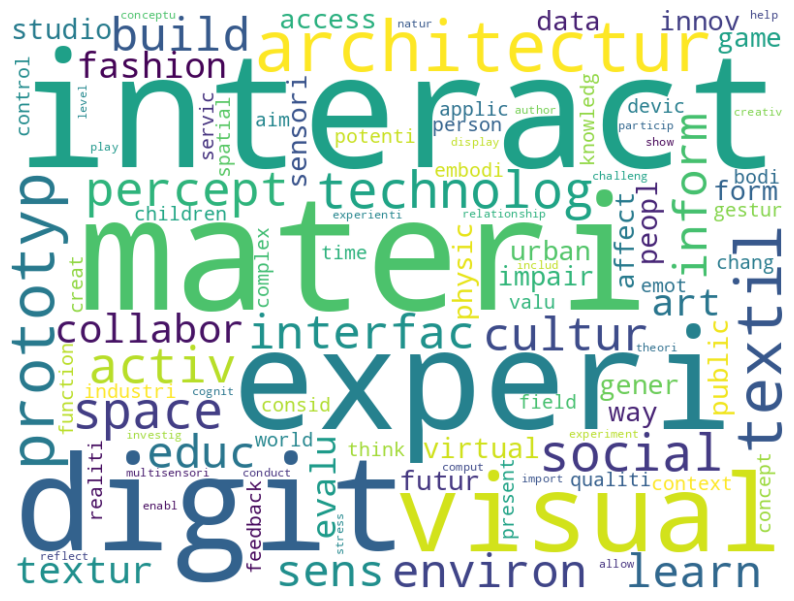

In [102]:
# 9. 이미지 출력 및 저장
plt.figure(figsize=(10,8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

cloud.to_file('word_cloud.png')



In [103]:
print(df['Title'].apply(type).value_counts())
print(df['Author Keywords'].apply(type).value_counts())
print(df['Abstract'].apply(type).value_counts())

Title
<class 'str'>    123
Name: count, dtype: int64
Author Keywords
<class 'str'>    123
Name: count, dtype: int64
Abstract
<class 'str'>    123
Name: count, dtype: int64


In [104]:
df['Title_Author Keywords_Abstract'] = (
    df['Title'].fillna('') + ' ' +
    df['Author Keywords'].fillna('') + ' ' +
    df['Abstract'].fillna('')
)

In [105]:
print(df['Title_Author Keywords_Abstract'].head())

0    Carbon Interactive Device Design Based on Open...
1    Modeling of collaborative perception of tactil...
2    Affective Qualities in Virtual Fashion: Explor...
3    Visual Art Accessibility and Art Experience fo...
4    Capstone Design for Innovation in Generation M...
Name: Title_Author Keywords_Abstract, dtype: object


In [106]:
print(df.shape)  # (행, 열)

(123, 12)


In [107]:
# 문서 수
print(f"문서 수: {len(df['processed_text'])}")

# 각 문서별 토큰 수
token_counts = df['processed_text'].apply(lambda x: len(x.split()))
print(f"평균 토큰 수: {token_counts.mean():.2f}")
print(f"최소 토큰 수: {token_counts.min()}")
print(f"최대 토큰 수: {token_counts.max()}")


문서 수: 123
평균 토큰 수: 103.42
최소 토큰 수: 5
최대 토큰 수: 241


In [108]:
from collections import Counter

all_tokens = [word for doc in df['processed_text'] for word in doc.split()]
token_freq = Counter(all_tokens)
print("상위 30개 단어:")
print(token_freq.most_common(30))


상위 30개 단어:
[('interact', 150), ('experi', 133), ('materi', 129), ('visual', 108), ('digit', 85), ('architectur', 61), ('social', 59), ('space', 58), ('activ', 58), ('technolog', 56), ('percept', 53), ('inform', 53), ('environ', 50), ('prototyp', 50), ('cultur', 43), ('sens', 43), ('evalu', 42), ('textil', 42), ('textur', 40), ('innov', 39), ('educ', 37), ('gener', 37), ('build', 37), ('futur', 36), ('form', 36), ('interfac', 36), ('affect', 35), ('concept', 35), ('art', 35), ('peopl', 35)]


In [109]:
print(f"tdm shape: {tdm.shape}")  # (문서 수, 단어 수)


tdm shape: (123, 2992)


In [110]:
print(df['processed_text'].sample(5, random_state=42))


18    decoupl geometri surfac finish parameter textu...
45    gener justic norm standard fall love moor law ...
47    give materi properti interact case tangibl cub...
89    code children children visual consid import re...
4     capston innov gener mz home applianc custom ex...
Name: processed_text, dtype: object


구분

In [114]:
# ===========================
# 1. 라이브러리 설치
# ===========================
!pip install gensim pyLDAvis

import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
nltk.download('punkt')
nltk.download('stopwords')

# ===========================
# 2. 데이터 불러오기 & 전처리
# ===========================
df = pd.read_csv('/content/cleaned_file.csv', encoding='utf-8')

def list_to_str(x):
    if isinstance(x, list):
        return ' '.join(x)
    else:
        return str(x)

df['Title'] = df['Title'].apply(list_to_str)
df['Author Keywords'] = df['Author Keywords'].apply(list_to_str)
df['Abstract'] = df['Abstract'].apply(list_to_str)

df['Title_Author Keywords_Abstract'] = (
    df['Title'].fillna('') + ' ' +
    df['Author Keywords'].fillna('') + ' ' +
    df['Abstract'].fillna('')
)

# 전처리 함수
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    tokens = [stemmer.stem(t) for t in tokens]
    return tokens

df['tokens'] = df['Title_Author Keywords_Abstract'].apply(preprocess_text)

# ===========================
# 3. Gensim용 Dictionary & Corpus
# ===========================
dictionary = corpora.Dictionary(df['tokens'])
dictionary.filter_extremes(no_below=5, no_above=0.5)  # 희귀 단어 제거
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

print(f"문서 수: {len(corpus)}, 단어 수: {len(dictionary)}")

# ===========================
# 4. LDA 모델 학습 (토픽 수 조정)
# ===========================
num_topics = 10 # 조정 가능
lda_model = models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=20,
    alpha='auto',
    per_word_topics=True
)

# ===========================
# 5. Perplexity & Coherence 계산
# ===========================
perplexity = lda_model.log_perplexity(corpus)
coherence_model = CoherenceModel(model=lda_model, texts=df['tokens'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f"Perplexity: {perplexity}")
print(f"Coherence Score: {coherence_score}")

# ===========================
# 6. 토픽별 주요 단어 출력
# ===========================
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx+1}: {topic}")

# ===========================
# 7. pyLDAvis 시각화
# ===========================
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

문서 수: 123, 단어 수: 542


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Perplexity: -6.205093937428776
Coherence Score: 0.2570559617060782
Topic 1: 0.017*"visual" + 0.017*"system" + 0.017*"access" + 0.016*"prototyp" + 0.015*"impair" + 0.013*"cultur" + 0.012*"develop" + 0.011*"think" + 0.011*"technolog" + 0.011*"social"
Topic 2: 0.038*"hand" + 0.021*"review" + 0.019*"live" + 0.017*"would" + 0.017*"daili" + 0.015*"knowledg" + 0.014*"comput" + 0.014*"fabric" + 0.014*"includ" + 0.014*"concern"
Topic 3: 0.029*"realiti" + 0.024*"tension" + 0.022*"perform" + 0.022*"product" + 0.021*"pattern" + 0.019*"augment" + 0.018*"percept" + 0.016*"autonom" + 0.015*"virtual" + 0.015*"embodi"
Topic 4: 0.028*"social" + 0.027*"activ" + 0.020*"cultur" + 0.015*"develop" + 0.015*"interact" + 0.014*"commun" + 0.014*"architectur" + 0.013*"relationship" + 0.013*"servic" + 0.013*"build"
Topic 5: 0.025*"research" + 0.024*"technolog" + 0.020*"interact" + 0.017*"tactil" + 0.016*"develop" + 0.016*"work" + 0.015*"prototyp" + 0.015*"strategi" + 0.014*"translat" + 0.012*"approach"
Topic 6: 0.

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.010920 -0.032189       1        1  24.182141
9     -0.007163 -0.009624       2        1  16.303386
0      0.030300  0.082423       3        1  12.059007
3      0.003985  0.059786       4        1  11.276896
5      0.073847  0.053230       5        1   9.335286
6      0.062330  0.084289       6        1   7.796254
4     -0.035437  0.019329       7        1   7.409763
2      0.094432 -0.205660       8        1   5.454488
8     -0.012906 -0.013966       9        1   3.760419
1     -0.220309 -0.037620      10        1   2.422359, topic_info=            Term        Freq       Total Category  logprob  loglift
392  architectur   58.000000   58.000000  Default  30.0000  30.0000
267      product   73.000000   73.000000  Default  29.0000  29.0000
143          art   33.000000   33.000000  Default  28.0000  28.0000
134      student   65.000000   65.000000  Default  27.0000  27.0000
232       materi  125.000000  125.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
128     research    2.921807   98.910631  Topic10  -4.3852   0.1984
226       haptic    2.295580   55.082998  Topic10  -4.6264   0.5426
215         also    2.122573   38.889308  Topic10  -4.7048   0.8123
53        inform    2.164744   51.540245  Topic10  -4.6851   0.5504
2         commun    2.099090   68.570750  Topic10  -4.7159   0.2341

[546 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
354       3  0.535846  abil
354       7  0.153099  abil
354       8  0.306197  abil
297       2  0.521296   abl
297       3  0.130324   abl
...     ...       ...   ...
251      10  0.059329  year
400       2  0.117499   yet
400       4  0.117499   yet
400       5  0.587494   yet
400       8  0.117499   yet

[1683 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 10, 1, 4, 6, 7, 5, 3, 9, 2])

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

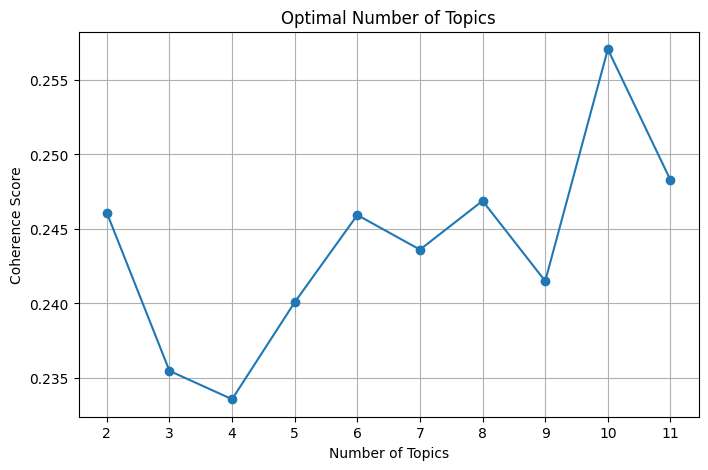

가장 높은 Coherence: 0.2571 (토픽 수: 10)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [113]:
# ===========================
# 8. 토픽 수별 Coherence 계산
# ===========================
def compute_coherence_values(dictionary, corpus, texts, start=2, limit=12, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=42,
            passes=20,
            alpha='auto',
            per_word_topics=True
        )
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# 파라미터 설정
start, limit, step = 2, 12, 1
model_list, coherence_values = compute_coherence_values(dictionary, corpus, df['tokens'], start, limit, step)

# ===========================
# 9. Coherence 변화 시각화
# ===========================
x = range(start, limit, step)
plt.figure(figsize=(8, 5))
plt.plot(x, coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.xticks(x)
plt.grid(True)
plt.show()

# 가장 Coherence가 높은 토픽 수와 값
optimal_topics = x[np.argmax(coherence_values)]
print(f"가장 높은 Coherence: {max(coherence_values):.4f} (토픽 수: {optimal_topics})")


추가 필요시 활용 토픽 수 별 값 계산

In [117]:
# 토픽 수 5만 계산
num_topics = 6
model = models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=20,
    alpha='auto',
    per_word_topics=True
)

coherencemodel = CoherenceModel(model=model, texts=df['tokens'], dictionary=dictionary, coherence='c_v')
coherence_score = coherencemodel.get_coherence()

print(f"토픽 수 {num_topics}일 때 Coherence 값: {coherence_score:.4f}")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/

KeyError: 'tokens'

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
num_topics = 5
model = models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=20,
    alpha='auto',
    per_word_topics=True
)

perplexity = model.log_perplexity(corpus)
print(f"토픽 수 {num_topics}일 때 Perplexity: {perplexity:.4f}")


In [ ]:
# ===========================
# 8. 토픽 수별 Perplexity & Coherence 계산
# ===========================
def compute_metrics(dictionary, corpus, texts, start=2, limit=12, step=1):
    coherence_values = []
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=42,
            passes=20,
            alpha='auto',
            per_word_topics=True
        )
        model_list.append(model)
        # Coherence
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        # Perplexity
        perplexity_values.append(model.log_perplexity(corpus))
    return model_list, coherence_values, perplexity_values

# 파라미터
start, limit, step = 2, 12, 1
model_list, coherence_values, perplexity_values = compute_metrics(dictionary, corpus, df['tokens'], start, limit, step)

# ===========================
# 9. Perplexity & Coherence 시각화
# ===========================
x = range(start, limit, step)
plt.figure(figsize=(10,5))
plt.plot(x, coherence_values, marker='o', label='Coherence')
plt.plot(x, perplexity_values, marker='x', label='Perplexity')
plt.xlabel("Number of Topics")
plt.ylabel("Score")
plt.title("Coherence & Perplexity by Number of Topics")
plt.legend()
plt.grid(True)
plt.show()

# 최적 값 출력
optimal_topics_coherence = x[np.argmax(coherence_values)]
optimal_topics_perplexity = x[np.argmin(perplexity_values)]
print(f"최고 Coherence: {max(coherence_values):.4f} (토픽 수: {optimal_topics_coherence})")
print(f"최저 Perplexity: {min(perplexity_values):.4f} (토픽 수: {optimal_topics_perplexity})")
